In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.shape

(8124, 23)

In [5]:
df['class'].unique

<bound method Series.unique of 0       p
1       e
2       e
3       p
4       e
5       e
6       e
7       e
8       p
9       e
10      e
11      e
12      e
13      p
14      e
15      e
16      e
17      p
18      p
19      p
20      e
21      p
22      e
23      e
24      e
25      p
26      e
27      e
28      e
29      e
       ..
8094    e
8095    p
8096    e
8097    p
8098    p
8099    e
8100    e
8101    p
8102    e
8103    e
8104    e
8105    e
8106    e
8107    e
8108    p
8109    e
8110    e
8111    e
8112    e
8113    p
8114    p
8115    e
8116    p
8117    p
8118    p
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object>

In [14]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [10]:
df.names()

AttributeError: 'DataFrame' object has no attribute 'names'

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
list = ['class','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']
for val in list:
    df[val] = le.fit_transform(df[val].astype(str))

In [16]:
x = df.iloc[:,1:23]
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,6,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,6,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,7,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,7,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,6,1,...,2,7,7,0,2,1,0,3,0,1
5,5,3,9,1,0,1,0,0,7,0,...,2,7,7,0,2,1,4,2,2,1
6,0,2,8,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,2,2,3
7,0,3,8,1,3,1,0,0,7,0,...,2,7,7,0,2,1,4,3,3,3
8,5,3,8,1,6,1,0,1,9,0,...,2,7,7,0,2,1,4,2,4,1
9,0,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3


In [17]:
df['class'] = le.fit_transform(df['class'])

In [18]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,6,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,6,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,7,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,7,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,6,...,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,7,...,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,4,...,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,7,...,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,9,...,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,2,3,3


In [21]:
y = df.iloc[:,0]

In [22]:
y

0       1
1       0
2       0
3       1
4       0
5       0
6       0
7       0
8       1
9       0
10      0
11      0
12      0
13      1
14      0
15      0
16      0
17      1
18      1
19      1
20      0
21      1
22      0
23      0
24      0
25      1
26      0
27      0
28      0
29      0
       ..
8094    0
8095    1
8096    0
8097    1
8098    1
8099    0
8100    0
8101    1
8102    0
8103    0
8104    0
8105    0
8106    0
8107    0
8108    1
8109    0
8110    0
8111    0
8112    0
8113    1
8114    1
8115    0
8116    1
8117    1
8118    1
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

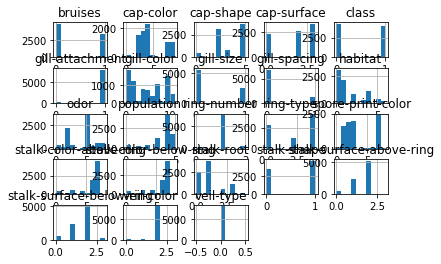

In [23]:
df.hist()
pyplot.show()

C:\Users\Amitesh.Patel\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\Amitesh.Patel\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\Amitesh.Patel\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:100: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


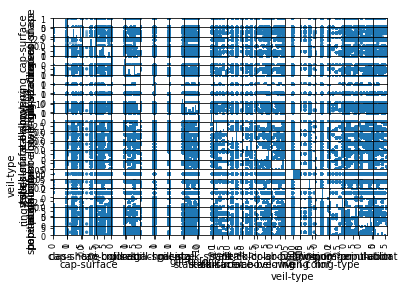

In [24]:
scatter_matrix(df)
pyplot.show()

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [34]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.951371 (0.011795)


C:\Users\Amitesh.Patel\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Amitesh.Patel\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Amitesh.Patel\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Amitesh.Patel\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Amitesh.Patel\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Amitesh.Patel\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("V

LDA: 0.944909 (0.010972)
KNN: 0.998616 (0.001605)
CART: 0.999846 (0.000462)
NB: 0.907521 (0.015631)
SVM: 0.999846 (0.000462)


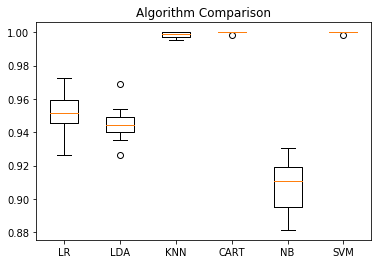

In [35]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [36]:
kfold = StratifiedKFold(n_splits=10, random_state=1)
model = DecisionTreeClassifier()
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')

In [37]:
cv_results

array([1.        , 1.        , 0.99846154, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [38]:
cv_results.mean()

0.9998461538461537

In [39]:
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

In [40]:
predictions

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [41]:
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

1.0
[[820   0]
 [  0 805]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [42]:
print('actual_score',Y_test)
print('predicted_score',predictions)

actual_score 1392    0
4051    1
3725    1
7177    1
103     0
3371    1
6738    1
1525    0
5838    1
4299    1
7549    1
6082    1
5189    1
4258    1
39      0
7916    0
6475    1
2213    0
3492    1
783     0
2079    0
8094    0
3375    0
161     0
4965    0
5832    1
3080    0
4398    1
4455    1
444     0
       ..
3532    0
4880    1
7799    1
5526    1
596     0
2487    0
3350    0
5318    0
4897    1
3176    0
44      0
3636    0
6363    1
2680    0
3964    1
1971    0
5311    1
7350    0
5364    1
7746    0
2704    0
6246    1
6003    1
6663    0
487     0
4484    1
3695    0
6878    1
94      0
8013    0
Name: class, Length: 1625, dtype: int64
predicted_score [0 1 1 ... 1 0 0]


In [43]:
from sklearn.externals import joblib
joblib.dump(model,'Project18_Mushroom.pkl')

C:\Users\Amitesh.Patel\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['Project18_Mushroom.pkl']